![Py4Eng](img/logo.png)

# Linear algebra
## Yoav Ram

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Let's create a square matrix `A`:

In [3]:
A = np.array([[1.0, 2.0], [3.0, 4.0]])
print(A)

[[ 1.  2.]
 [ 3.  4.]]


Find the transpose of `A`:

In [4]:
print(A.transpose())

[[ 1.  3.]
 [ 2.  4.]]


Note that we got a *view* of the matrix, not a copy, so if we change `A_trans` we also change `A`:

In [5]:
A_trans = A.transpose()
A_trans[0, 0] = 10
print(A)

[[ 10.   2.]
 [  3.   4.]]


`A.T` is just a shortcut for `A.transpose()`:

In [6]:
A.T[0, 0] = 10
print(A)

[[ 10.   2.]
 [  3.   4.]]


If we want a copy of `A.T` we have to be explicit about it:

In [7]:
A_trans = A.T.copy()
A_trans[0, 0] = 22
print(A)

[[ 10.   2.]
 [  3.   4.]]


We can find the trace of `A`:

In [8]:
np.trace(A)

14.0

And invert it:

In [9]:
A_inv = np.linalg.inv(A)
print(A_inv)

[[ 0.11764706 -0.05882353]
 [-0.08823529  0.29411765]]


Let's create the Id matrix with the same shape as `A`:

In [10]:
U = np.eye(*A.shape)
print(U)

[[ 1.  0.]
 [ 0.  1.]]


Matrix (dot) multiplication is done with the `.dot` method:

We find that $A \cdot A^{-1} \ne 0$:

In [11]:
(np.dot(A, A_inv) == U).all()

False

In [12]:
(A.dot(A_inv) == U).all()

False

With Python >= 3.5 and NumPy >= 1.10 you can use the [@ operator](https://docs.python.org/3/whatsnew/3.5.html#whatsnew-pep-465) for matrix multiplication:

In [13]:
(A @ A_inv == U).all()

False

In [14]:
print(A @ A_inv)

[[  1.00000000e+00   0.00000000e+00]
 [ -5.55111512e-17   1.00000000e+00]]


This is because of numerical errors. Instead of checking with `==` we can check with `np.allclose`, which checks equality with some tolerance (see `help(np.allclose)` for controling the tolerance):

In [15]:
np.allclose(A @ A_inv, U)

True

## Exercise

Compute the determinant of the matrix:

$$
 \begin{bmatrix}
-5 & -3 & 7 \\
2 & -5 & 8 \\
1 & 4 & -2 \\ 
\end{bmatrix} 
$$

using the `np.linalg.det` function.

165.00000000000009

## Solving linear equation systems

Solve $Ab = y$ for vector $b$:

In [16]:
y = np.array([5, 7])
b = np.linalg.solve(A, y)
print(b)

[ 0.17647059  1.61764706]


In [17]:
print((A @ b == y).all())
print(np.allclose(A @ b, y))

True
True


## Eigenvalues

We can find the eigenvalues of `A`:

In [18]:
eigvals, eigvecs = np.linalg.eig(A)
print("eigenvalues:", eigvals)
print("eigenvectors:\n", *eigvecs)

eigenvalues: [ 10.87298335   3.12701665]
eigenvectors:
 [ 0.91649636 -0.2794051 ] [ 0.40004303  0.96017331]


Works for a large matrix, too - let's create a big random matrix, and plot it with `matshow`:

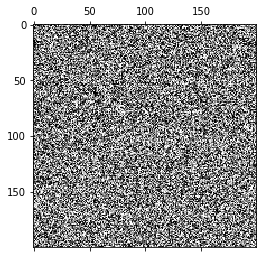

In [19]:
X = np.random.randint(0, 9, size=(200, 200))
plt.matshow(X, cmap='gray');

Now only find the eigenvalues. Then we plot their real part and their imaginary part:

In [23]:
eigvals = np.linalg.eigvals(X)

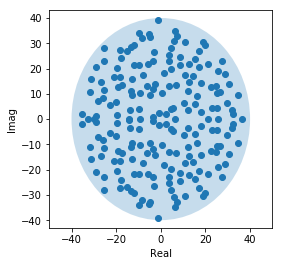

In [34]:
fig, ax = plt.subplots(figsize=plt.figaspect(1))
ax.scatter(eigvals.real, eigvals.imag)
circle = plt.Circle((0, 0), 40, alpha=0.25)
ax.add_artist(circle)
ax.set(
    xlabel='Real',
    ylabel='Imag',
    xlim=(-50, 50) # there is one eigenvalue ~800
);

## Singular value decomposition

Compute an approximate basis for the nullspace of `A` using the singular value decomposition (SVD) of `A`:

In [2]:
A = np.array([
        [1, 2, 3], 
        [4, 5, 6], 
        [7, 8, 9]
])

# A = np.array([
#         [1, 2, 3, 4], 
#         [4, 5, 6, 7], 
#         [7, 8, 9, 10],
#         [11, 12, 13, 14]
# ])
print(A)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


We use `np.linalg.svd`:

In [27]:
help(np.linalg.svd)

Help on function svd in module numpy.linalg.linalg:

svd(a, full_matrices=1, compute_uv=1)
    Singular Value Decomposition.
    
    Factors the matrix `a` as ``u * np.diag(s) * v``, where `u` and `v`
    are unitary and `s` is a 1-d array of `a`'s singular values.
    
    Parameters
    ----------
    a : (..., M, N) array_like
        A real or complex matrix of shape (`M`, `N`) .
    full_matrices : bool, optional
        If True (default), `u` and `v` have the shapes (`M`, `M`) and
        (`N`, `N`), respectively.  Otherwise, the shapes are (`M`, `K`)
        and (`K`, `N`), respectively, where `K` = min(`M`, `N`).
    compute_uv : bool, optional
        Whether or not to compute `u` and `v` in addition to `s`.  True
        by default.
    
    Returns
    -------
    u : { (..., M, M), (..., M, K) } array
        Unitary matrices. The actual shape depends on the value of
        ``full_matrices``. Only returned when ``compute_uv`` is True.
    s : (..., K) array
        The si

In [3]:
U, s, Vh = np.linalg.svd(A)
S = np.diag(s)
np.allclose(A, U.dot(S).dot(Vh))

True

Now we find the position of the first almost-zero element in `s`, which is sorted in descending order:

In [4]:
print('s:\n', s)
first_zero = (s >= 1e-13).sum() 
print('First zero:\n', first_zero)

s:
 [  1.68481034e+01   1.06836951e+00   1.47280825e-16]
First zero:
 2


The nullspace basis are the transpose of the conjugate of the vectors in `Vh` starting from the index of the first almost-zero in `s`:

In [5]:
nullspace = Vh[first_zero:].conj().T
print('Nullspace:\n', nullspace)

Nullspace:
 [[ 0.40824829]
 [-0.81649658]
 [ 0.40824829]]


Let's check that indeed these vectors are in the nullspace by multiplying them with `A`:

In [6]:
for j in range(nullspace.shape[1]):
    print('A*v_{} = {}'.format(j, A.dot(nullspace[:, j])))
    print('Close to zero:', np.allclose(A.dot(nullspace[:, j]), 0))

A*v_0 = [ -1.55431223e-15  -8.88178420e-16   0.00000000e+00]
Close to zero: True


## Exercise

Compute a random $n$-by-$n$ binary matrix using one of the random number functions in `np.random`.

Then calculate the matrix rank with `np.linalg.matrix_rank` (which uses an SVD decomposition like we did above). 

Check if the rank is $n$.

Repeat the process many time (1000? 100000?) to check the probability of drawing a random matrix with a full rank.

*Bonus* Write the whole thing in a single line.

See solution in [full_rank.py](../solutions/full_rank.py).

# References

- [NumPy tutorial: Linear algebra](https://docs.scipy.org/doc/numpy-dev/user/quickstart.html#linear-algebra)
- [SciPy cookbook nullspace recipe](https://scipy.github.io/old-wiki/pages/Cookbook/RankNullspace.html)

## Colophon
This notebook was written by [Yoav Ram](http://python.yoavram.com) and is part of the [_Python for Engineers_](https://github.com/yoavram/Py4Eng) course.

The notebook was written using [Python](http://python.org/) 3.6.1.
Dependencies listed in [environment.yml](../environment.yml), full versions in [environment_full.yml](../environment_full.yml).

This work is licensed under a CC BY-NC-SA 4.0 International License.

![Python logo](https://www.python.org/static/community_logos/python-logo.png)